In [32]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
url = 'https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

#second table in the wiki page
superbowl = soup.find_all('table')[1]

table = superbowl.find_all('th')
table = [tab.text.strip() for tab in table]

table

['Game',
 'Date/Season',
 'Winning team',
 'Score',
 'Losing team',
 'Venue',
 'City',
 'Attendance',
 'Referee',
 'Ref']

In [34]:
#turnign the website data into a df
df = pd.DataFrame(columns=table)
col_data = superbowl.find_all('tr')

for row in col_data[1:]:
  row_data = row.find_all('td')
  individual_row = [data.text.strip() for data in row_data]
  length = len(df)
  df.loc[length] = individual_row
df


,Game,Date/Season,Winning team,Score,Losing team,Venue,City,Attendance,Referee,Ref
0,I[sb 1],"January 15, 1967 (1966 AFL/1966 NFL)","Green Bay Packersn(1, 1–0)",35–10,"Kansas City Chiefsa(1, 0–1)",Los Angeles Memorial Coliseum,"Los Angeles, California[sb 2]","61,946",Norm Schachter,[7][8]
1,II[sb 1],"January 14, 1968 (1967 AFL/1967 NFL)","Green Bay Packersn(2, 2–0)",33–14,"Oakland Raidersa(1, 0–1)",Miami Orange Bowl,"Miami, Florida[sb 3]","75,546",Jack Vest,[9][8]
2,III[sb 1],"January 12, 1969 (1968 AFL/1968 NFL)","New York Jetsa(1, 1–0)",16–7,"Baltimore Coltsn(1, 0–1)",Miami Orange Bowl (2),"Miami, Florida (2)[sb 3]","75,389",Tom Bell,[10][8]
3,IV[sb 1],"January 11, 1970 (1969 AFL/1969 NFL)","Kansas City Chiefsa(2, 1–1)",23–7,"Minnesota Vikingsn(1, 0–1)",Tulane Stadium,"New Orleans, Louisiana","80,562",John McDonough,[11][8]
4,V,"January 17, 1971 (1970)","Baltimore ColtsA(2, 1–1)",16–13,"Dallas CowboysN(1, 0–1)",Miami Orange Bowl (3),"Miami, Florida (3)[sb 3]","79,204",Norm Schachter,[12][8]
5,VI,"January 16, 1972 (1971)","Dallas CowboysN(2, 1–1)",24–3,"Miami DolphinsA(1, 0–1)",Tulane Stadium (2),"New Orleans, Louisiana (2)","81,023",Jim Tunney,[13][8]
6,VII,"January 14, 1973 (1972)","Miami DolphinsA(2, 1–1)",14–7,"Washington RedskinsN(1, 0–1)",Los Angeles Memorial Coliseum (2),"Los Angeles, California (2)[sb 2]","90,182",Tom Bell,[14][8]
7,VIII,"January 13, 1974 (1973)","Miami DolphinsA(3, 2–1)",24–7,"Minnesota VikingsN(2, 0–2)",Rice Stadium[sb 4],"Houston, Texas","71,882",Ben Dreith,[15][8]
8,IX,"January 12, 1975 (1974)","Pittsburgh SteelersA(1, 1–0)",16–6,"Minnesota VikingsN(3, 0–3)",Tulane Stadium (3),"New Orleans, Louisiana (3)","80,997",Bernie Ulman,[16][8]
9,X,"January 18, 1976 (1975)","Pittsburgh SteelersA(2, 2–0)",21–17,"Dallas CowboysN(3, 1–2) [W]",Miami Orange Bowl (4),"Miami, Florida (4)[sb 3]","80,187",Norm Schachter,[17][8]


In [35]:
df['Attendance'] = df['Attendance'].apply(lambda x: int(str(x).replace(',', '')))


In [36]:
#cleaning
df.drop(['Date/Season', 'City', 'Venue', 'Referee', 'Ref'], axis=1, inplace=True)


In [40]:
#cleaning removing record from the team and the confrence
for index in range(len(df)):
  Wteam = df.at[index, 'Winning team']
  Wteam = Wteam[:Wteam.rfind('(') -1]
  df.at[index, 'Winning team'] = Wteam
  Lteam = df.at[index, 'Losing team']
  Lteam = Lteam[:Lteam.rfind('(') -1]
  df.at[index, 'Losing team'] = Lteam


In [44]:
for index in range(len(df)):
  score = df.at[index, 'Score']
  score = str(score)
  df.at[index, 'WScore'] = score[:2]
  df.at[index, 'LScore'] = score[3:]

In [45]:
#adding teh score of the game for each result to the df
for index in range(len(df)):
  score = df.at[index, 'Score']
  score = str(score)
  if '(OT)' in score:
   df.at[index, 'overtime'] = True;
   df.at[index, 'WScore'] = df.at[index, 'WScore'].replace('(OT)', '')
   df.at[index, 'LScore'] = df.at[index, 'LScore'].replace('(OT)', '')
  else:
     df.at[index, 'overtime'] = False;



In [46]:
df['WScore'] = df['WScore'].astype(int)
df['LScore'] = df['LScore'].astype(int)
df

,Game,Winning team,Score,Losing team,Attendance,overtime,WScore,LScore
0,I[sb 1],Green Bay Pac,35–10,Kansas City Ch,61946,False,35,10
1,II[sb 1],Green Bay Pac,33–14,Oakland Rai,75546,False,33,14
2,III[sb 1],New York,16–7,Baltimore C,75389,False,16,7
3,IV[sb 1],Kansas City Ch,23–7,Minnesota Vik,80562,False,23,7
4,V,Baltimore C,16–13,Dallas Cow,79204,False,16,13
5,VI,Dallas Cow,24–3,Miami Dolp,81023,False,24,3
6,VII,Miami Dolp,14–7,Washington Reds,90182,False,14,7
7,VIII,Miami Dolp,24–7,Minnesota Vik,71882,False,24,7
8,IX,Pittsburgh Stee,16–6,Minnesota Vik,80997,False,16,6
9,X,Pittsburgh Stee,21–17,Dallas Cow,80187,False,21,17


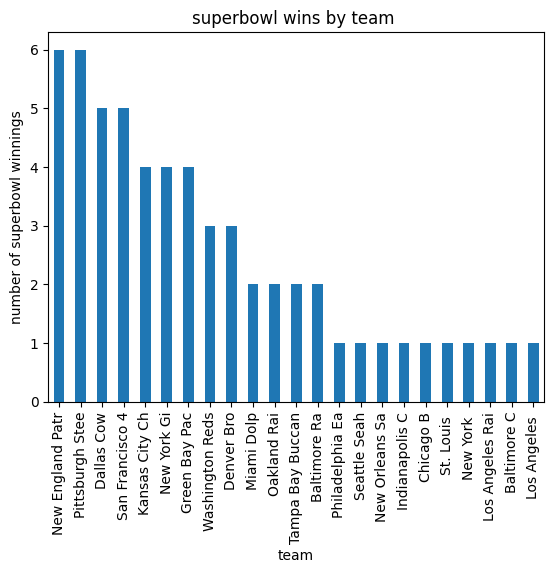

In [47]:
data = df['Winning team'].value_counts()

data.plot(kind='bar', )
plt.title('superbowl wins by team ')
plt.ylabel('number of superbowl winnings')
plt.xlabel('team')

plt.show()

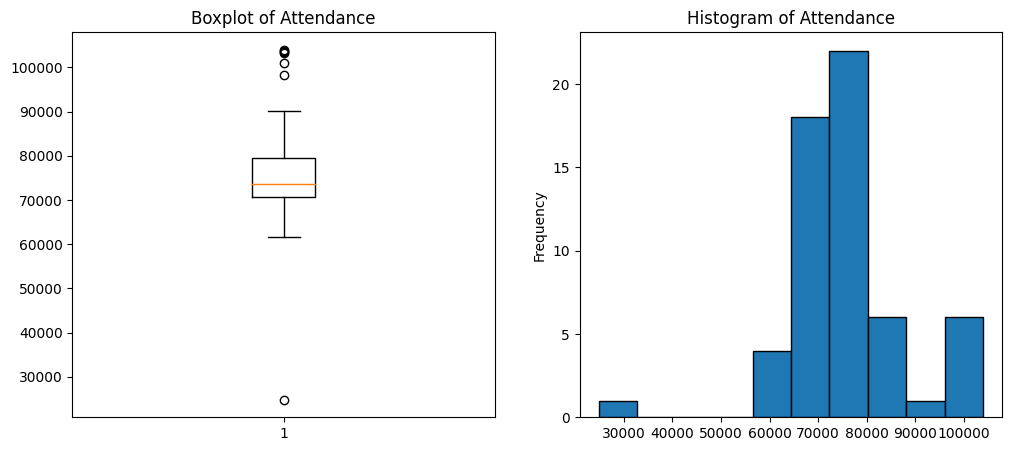

In [48]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].boxplot(df['Attendance'])
axes[0].set_title(f'Boxplot of Attendance')
df['Attendance'].plot(kind='hist', bins=10, edgecolor='black', ax=axes[1])
axes[1].set_title(f'Histogram of Attendance')

plt.show()

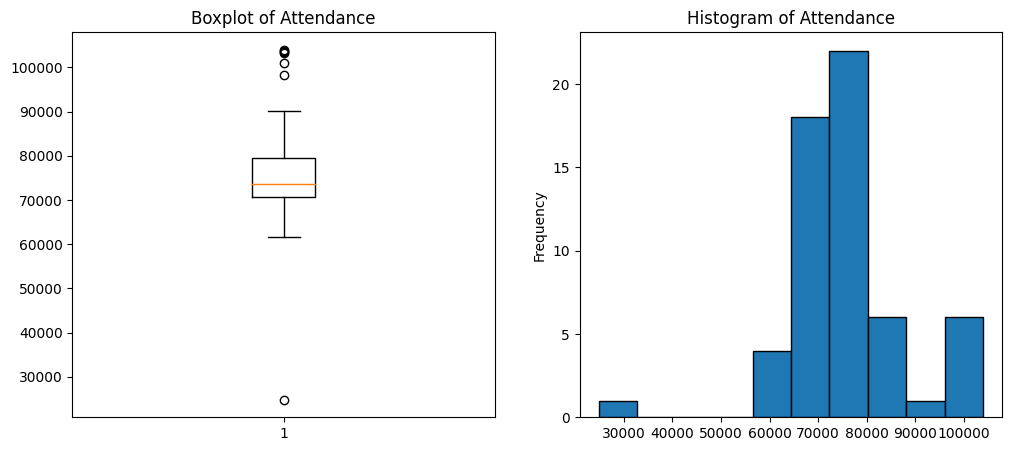

In [49]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].boxplot(df['Attendance'])
axes[0].set_title(f'Boxplot of Attendance')
df['Attendance'].plot(kind='hist', bins=10, edgecolor='black', ax=axes[1])
axes[1].set_title(f'Histogram of Attendance')

plt.show()

<Axes: >

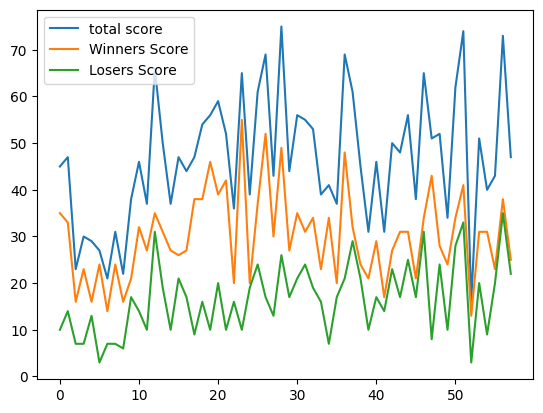

In [51]:
numeric = pd.DataFrame()

numeric["total score"] = df["WScore"] + df["LScore"]
numeric['Winners Score'] = df["WScore"]
numeric['Losers Score'] = df["LScore"]
numeric.plot()
